### Python para análise fundamentalista
- Income Statement = DRE
- Balance Sheet = Balanço patrimonial
- Cash Flow = Fluxo de caixa
- Biblioteca "investpy" e método .get_stock_financial_summary()
- Argumento "summary_type": "balance_sheet", "income_statement" e "cash_flow_statement"

In [34]:
import investpy

dados = investpy.get_stock_financial_summary(stock="ITUB3", country="Brazil", summary_type="cash_flow_statement")

dados.sort_index()

dados # Tipo Float, quero Integer (int)



,Cash From Operating Activities,Cash From Investing Activities,Cash From Financing Activities,Net Change in Cash
Date,,,,
2023-12-31,-2421.0,-31230.0,57466.0,12286.0
2022-12-31,108567.0,-73270.0,-10648.0,370.0
2021-12-31,12944.0,-4841.0,9902.0,-1936.0
2020-12-31,-242459.0,753.0,288395.0,35012.0


### Mudança de tipos de dados
- Transformar via método .astype()
- Tratamento rápido de datas .strftime(%d/%m/%Y)

In [35]:
dados["Net Change in Cash"] = dados["Net Change in Cash"].astype(int)

dados

,Cash From Operating Activities,Cash From Investing Activities,Cash From Financing Activities,Net Change in Cash
Date,,,,
2023-12-31,-2421.0,-31230.0,57466.0,12286
2022-12-31,108567.0,-73270.0,-10648.0,370
2021-12-31,12944.0,-4841.0,9902.0,-1936
2020-12-31,-242459.0,753.0,288395.0,35012


<Axes: title={'center': 'Margem Líquida'}, xlabel='Date'>

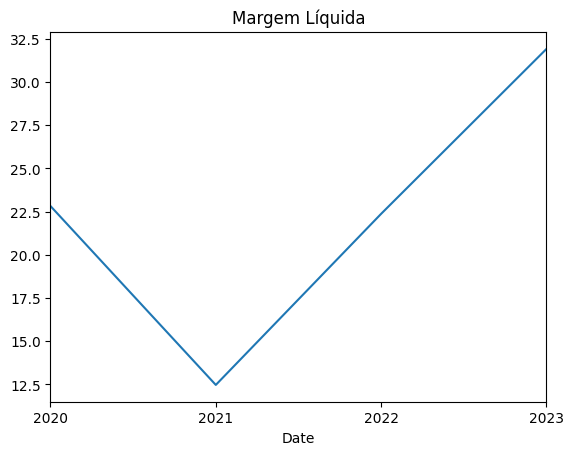

In [36]:
dados = investpy.get_stock_financial_summary(stock="EGIE3", country="Brazil", summary_type="income_statement")
dados["Margem Líquida"] = round((dados["Net Income"] / dados["Total Revenue"]) * 100, 2)
dados["Margem Líquida"].plot(title="Margem Líquida")

In [37]:
dados.index = dados.index.strftime("%d/%m/%Y")

dados

,Total Revenue,Operating Income,Net Income,Margem Líquida
Date,,,,
31/12/2023,10747.78,5456.01,3429.56,31.91
31/12/2022,11906.60,5178.31,2663.08,22.37
31/12/2021,12540.67,4902.66,1563.72,12.47
31/12/2020,12259.16,5645.94,2797.09,22.82


In [40]:
for stock in ["ITUB3", "EGIE3"]:
    dados = investpy.get_stock_financial_summary(stock=stock, country="Brazil", summary_type="income_statement")
    print(dados)

# Loops: For e While

            Total Revenue  Net Income
Date                                 
2023-12-31       314339.0     33105.0
2022-12-31       259439.0     29207.0
2021-12-31       195301.0     26760.0
2020-12-31       184549.0     18896.0
            Total Revenue  Operating Income  Net Income
Date                                                   
2023-12-31       10747.78           5456.01     3429.56
2022-12-31       11906.60           5178.31     2663.08
2021-12-31       12540.67           4902.66     1563.72
2020-12-31       12259.16           5645.94     2797.09


In [38]:
# import investpy

# def análise(ação):
#     ativo = investpy.get_stock_financial_summary(stock=ação, country="Brazil", summary_type="income_statement", period="annual").sort_index()
#     ativo.index = ativo.index.strftime("%d/%m/%Y")

#     for coluna in list(ativo.columns):
#         ativo[coluna] = ativo[coluna].astype(int)

#     ativo["Margem Líquida"] = round(ativo["Net Income"] / ativo["Total Revenue"], 4)
#     return ativo

# dados = análise("ITUB3")